# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [117]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np

In [118]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [120]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [121]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [122]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [124]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [125]:
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [126]:
numeric = df.select_dtypes(include=['int64','float64']).columns
numeric =  numeric.drop(['booking_complete'])
numeric


Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'],
      dtype='object')

In [127]:
df[numeric].head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,262,19,7,6,1,0,0,5.52
1,1,112,20,3,6,0,0,0,5.52
2,2,243,22,17,3,1,1,0,5.52
3,1,96,31,4,6,0,0,1,5.52
4,2,68,22,15,3,1,0,1,5.52


In [128]:
from tqdm.notebook import tqdm

In [129]:
# for column in tqdm(numeric):
#     fig = px.histogram(df , x = column,title= f"{column} vs booking",color= 'booking_complete')
#     fig.show()

In [130]:
# sns.pairplot(df,hue='booking_complete')

<AxesSubplot: xlabel='purchase_lead', ylabel='length_of_stay'>

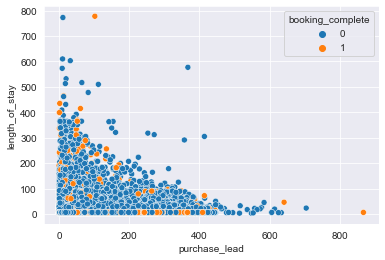

In [131]:
sns.scatterplot(data = df,x = df['purchase_lead'],y=df['length_of_stay'],hue='booking_complete')

In [132]:
df[df['length_of_stay'] >= 168]
# np.percentile(df['length_of_stay'],99)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
73,1,Internet,RoundTrip,198,207,10,7,AKLKIX,Japan,1,0,1,7.00,0
83,1,Internet,RoundTrip,31,274,10,2,AKLKUL,Malaysia,1,0,0,8.83,0
104,1,Internet,RoundTrip,93,196,8,2,AKLKUL,Germany,1,0,0,8.83,0
115,1,Internet,RoundTrip,65,278,2,4,AKLKUL,Malaysia,0,0,0,8.83,0
124,1,Internet,RoundTrip,22,180,13,4,AKLKUL,Malaysia,1,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25433,2,Internet,RoundTrip,146,213,1,5,SYDTRZ,Australia,1,1,1,8.58,0
25464,1,Internet,RoundTrip,33,180,8,2,SYDTRZ,Australia,0,1,0,8.58,0
25472,1,Internet,RoundTrip,78,178,23,3,SYDTRZ,Australia,1,0,0,8.58,0
25500,1,Internet,RoundTrip,20,263,23,7,SYDTRZ,Australia,1,0,1,8.58,0


In [133]:
# for col in tqdm(numeric):
#     plt.figure(figsize=(5,5))
#     fig = sns.boxplot(x=col,data=df)
#     plt.title(f'Boxplot of {col}')
#     plt.show()


# Model Selection

In [134]:
import sklearn 
from sklearn.model_selection import train_test_split

In [135]:
train_df, test_df = train_test_split(df,test_size=0.2,random_state=42)

In [136]:
print(train_df.shape)
print(test_df.shape)

(40000, 14)
(10000, 14)


# train set

In [137]:
x_train = train_df.loc[:,df.columns != 'booking_complete']
x_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
39087,1,Mobile,RoundTrip,15,5,13,7,ICNKCH,Malaysia,0,0,1,6.62
30893,1,Internet,RoundTrip,298,4,9,1,DMKMEL,Thailand,1,0,0,8.83
45278,2,Internet,RoundTrip,200,6,5,3,DPSICN,South Korea,1,0,0,6.62
16398,1,Internet,RoundTrip,79,21,11,6,KCHSYD,Australia,1,0,0,8.58
13653,1,Internet,RoundTrip,105,20,6,7,ICNMAA,South Korea,1,0,1,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,Internet,RoundTrip,20,91,11,5,HANSYD,Vietnam,1,0,1,8.58
44732,1,Internet,RoundTrip,65,6,18,3,DMKMRU,Mauritius,1,1,1,7.42
38158,2,Mobile,RoundTrip,107,5,6,2,HKTHND,Thailand,1,0,0,7.57
860,4,Internet,RoundTrip,232,19,8,2,AKLKUL,New Zealand,0,0,0,8.83


In [138]:
y_train = train_df.loc[:,df.columns == 'booking_complete']
y_train

,booking_complete
39087,0
30893,1
45278,0
16398,0
13653,0
...,...
11284,0
44732,0
38158,1
860,0


# Test Data set


In [139]:
x_test = test_df.loc[:,df.columns != 'booking_complete']
x_test

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
33553,2,Internet,RoundTrip,47,4,15,4,KIXSIN,Japan,1,1,0,7.00
9427,1,Mobile,RoundTrip,46,85,14,1,DMKOOL,Thailand,1,1,0,8.83
199,1,Internet,RoundTrip,132,20,9,1,AKLKUL,Slovakia,1,0,0,8.83
12447,1,Internet,RoundTrip,58,18,23,1,HNDKTM,Japan,1,1,1,7.57
39489,2,Internet,RoundTrip,50,5,5,4,ICNSIN,China,1,0,0,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,5,Internet,RoundTrip,27,3,15,6,KNOTPE,Indonesia,1,0,0,4.67
25079,1,Internet,RoundTrip,47,87,4,2,SGNSYD,Australia,0,1,1,8.58
18707,2,Internet,RoundTrip,27,28,7,1,MELMNL,Philippines,1,1,1,8.83
15200,1,Internet,RoundTrip,2,73,7,2,JHBKIX,Japan,1,1,1,7.00


In [140]:
y_test = test_df.loc[:,df.columns == 'booking_complete']
y_test

,booking_complete
33553,0
9427,0
199,0
12447,0
39489,0
...,...
28567,0
25079,0
18707,0
15200,0


In [141]:
categoricalcols = df.select_dtypes(include=['object'])
categoricalcols.nunique()

sales_channel       2
trip_type           3
route             799
booking_origin    104
dtype: int64

In [142]:
df_copy = df

In [143]:
import category_encoders as ce

In [144]:
mean_enc = ce.TargetEncoder(cols=['route','booking_origin'])


# Dealing with outliers

In [145]:
x_train.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.591875,84.811150,23.066675,9.067225,3.815400,0.667950,0.295500,0.425850,7.273254
std,1.015670,90.301775,33.533594,5.409990,1.995876,0.470955,0.456273,0.494477,1.498109
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000
max,9.000000,704.000000,773.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000


In [146]:
q1 = np.percentile(x_train['purchase_lead'],25)
q3 =  np.percentile(x_train['purchase_lead'],75)
iqr_lead = np.percentile(x_train['purchase_lead'],75)-np.percentile(x_train['purchase_lead'],25)
print(iqr_lead,q1,q3)


94.0 21.0 115.0


In [147]:
x_train['purchase_lead'][x_train['purchase_lead']> (q3 + 1.5*iqr_lead)] = q3 + 1.5*iqr_lead

C:\Users\riddh\AppData\Local\Temp\ipykernel_10024\807006434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['purchase_lead'][x_train['purchase_lead']> (q3 + 1.5*iqr_lead)] = q3 + 1.5*iqr_lead
C:\Users\riddh\AppData\Local\Temp\ipykernel_10024\807006434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['purchase_lead'][x_train['purchase_lead']> (q3 + 1.5*iqr_lead)] = q3 + 1.5*iqr_lead


In [148]:
q1 = np.percentile(x_train['length_of_stay'],25)
q3 =  np.percentile(x_train['length_of_stay'],75)
iqr_lead = np.percentile(x_train['length_of_stay'],75)-np.percentile(x_train['length_of_stay'],25)
print(iqr_lead,q1,q3)

23.0 5.0 28.0


In [149]:
x_train['length_of_stay'][x_train['length_of_stay']> (q3 + 1.5*iqr_lead)] =  q3 + 1.5*iqr_lead

C:\Users\riddh\AppData\Local\Temp\ipykernel_10024\3891138060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['length_of_stay'][x_train['length_of_stay']> (q3 + 1.5*iqr_lead)] =  q3 + 1.5*iqr_lead
C:\Users\riddh\AppData\Local\Temp\ipykernel_10024\3891138060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['length_of_stay'][x_train['length_of_stay']> (q3 + 1.5*iqr_lead)] =  q3 + 1.5*iqr_lead


<AxesSubplot: xlabel='length_of_stay'>

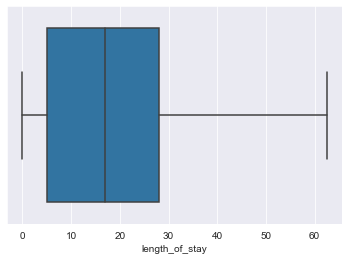

In [150]:
sns.boxplot(data=x_train,x = 'length_of_stay')

In [151]:
x_test.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.588700,85.457800,22.956100,9.062800,3.8105,0.672100,0.302800,0.43230,7.294787
std,1.037998,91.050035,35.270035,5.423596,1.9805,0.469472,0.459492,0.49542,1.491817
min,1.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.00000,4.670000
25%,1.000000,21.000000,5.000000,5.000000,2.0000,0.000000,0.000000,0.00000,5.620000
50%,1.000000,51.500000,17.000000,9.000000,4.0000,1.000000,0.000000,0.00000,7.570000
75%,2.000000,116.250000,28.000000,13.000000,5.0000,1.000000,1.000000,1.00000,8.830000
max,9.000000,867.000000,778.000000,23.000000,7.0000,1.000000,1.000000,1.00000,9.500000


In [152]:
q1 = np.percentile(x_test['purchase_lead'],25)
q3 =  np.percentile(x_test['purchase_lead'],75)
iqr_lead = np.percentile(x_test['purchase_lead'],75)-np.percentile(x_test['purchase_lead'],25)
print(iqr_lead,q1,q3)
x_test['purchase_lead'][x_test['purchase_lead']> (q3 + 1.5*iqr_lead)] = q3 + 1.5*iqr_lead

95.25 21.0 116.25


C:\Users\riddh\AppData\Local\Temp\ipykernel_10024\2799236011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['purchase_lead'][x_test['purchase_lead']> (q3 + 1.5*iqr_lead)] = q3 + 1.5*iqr_lead
C:\Users\riddh\AppData\Local\Temp\ipykernel_10024\2799236011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['purchase_lead'][x_test['purchase_lead']> (q3 + 1.5*iqr_lead)] = q3 + 1.5*iqr_lead


In [153]:
q1 = np.percentile(x_test['length_of_stay'],25)
q3 =  np.percentile(x_test['length_of_stay'],75)
iqr_lead = np.percentile(x_test['length_of_stay'],75)-np.percentile(x_test['length_of_stay'],25)
print(iqr_lead,q1,q3)
x_test['length_of_stay'][x_test['length_of_stay']> (q3 + 1.5*iqr_lead)] =  q3 + 1.5*iqr_lead

23.0 5.0 28.0


C:\Users\riddh\AppData\Local\Temp\ipykernel_10024\3145483663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['length_of_stay'][x_test['length_of_stay']> (q3 + 1.5*iqr_lead)] =  q3 + 1.5*iqr_lead
C:\Users\riddh\AppData\Local\Temp\ipykernel_10024\3145483663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['length_of_stay'][x_test['length_of_stay']> (q3 + 1.5*iqr_lead)] =  q3 + 1.5*iqr_lead


# Encoding Train , Val , Test data set

In [154]:
x_train_mencoded = mean_enc.fit_transform(x_train,y_train)
x_train_mencoded

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
39087,1,Mobile,RoundTrip,15,5.0,13,7,0.404339,0.344471,0,0,1,6.62
30893,1,Internet,RoundTrip,256,4.0,9,1,0.076642,0.231804,1,0,0,8.83
45278,2,Internet,RoundTrip,200,6.0,5,3,0.081633,0.100056,1,0,0,6.62
16398,1,Internet,RoundTrip,79,21.0,11,6,0.201258,0.050216,1,0,0,8.58
13653,1,Internet,RoundTrip,105,20.0,6,7,0.102800,0.100056,1,0,1,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,Internet,RoundTrip,20,62.5,11,5,0.201934,0.286604,1,0,1,8.58
44732,1,Internet,RoundTrip,65,6.0,18,3,0.180968,0.110054,1,1,1,7.42
38158,2,Mobile,RoundTrip,107,5.0,6,2,0.125028,0.231804,1,0,0,7.57
860,4,Internet,RoundTrip,232,19.0,8,2,0.216480,0.048463,0,0,0,8.83


In [155]:
x_train_mencoded = x_train_mencoded.drop(columns=['flight_hour','flight_day'])
x_train_mencoded.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
39087,1,Mobile,RoundTrip,15,5.0,0.404339,0.344471,0,0,1,6.62
30893,1,Internet,RoundTrip,256,4.0,0.076642,0.231804,1,0,0,8.83
45278,2,Internet,RoundTrip,200,6.0,0.081633,0.100056,1,0,0,6.62
16398,1,Internet,RoundTrip,79,21.0,0.201258,0.050216,1,0,0,8.58
13653,1,Internet,RoundTrip,105,20.0,0.102800,0.100056,1,0,1,6.62


In [156]:
x_test_mencoded = mean_enc.fit_transform(x_test,y_test)
x_test_mencoded = x_test_mencoded.drop(columns=['flight_hour','flight_day'])
x_test_mencoded.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
33553,2,Internet,RoundTrip,47.0,4.0,0.321153,0.107500,1,1,0,7.00
9427,1,Mobile,RoundTrip,46.0,62.5,0.057555,0.230380,1,1,0,8.83
199,1,Internet,RoundTrip,132.0,20.0,0.191729,0.128744,1,0,0,8.83
12447,1,Internet,RoundTrip,58.0,18.0,0.127006,0.107500,1,1,1,7.57
39489,2,Internet,RoundTrip,50.0,5.0,0.122222,0.209877,1,0,0,6.62


In [157]:
x_train_mencoded = pd.get_dummies(data=x_train_mencoded,drop_first=True)
x_train_mencoded

,num_passengers,purchase_lead,length_of_stay,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
39087,1,15,5.0,0.404339,0.344471,0,0,1,6.62,1,0,1
30893,1,256,4.0,0.076642,0.231804,1,0,0,8.83,0,0,1
45278,2,200,6.0,0.081633,0.100056,1,0,0,6.62,0,0,1
16398,1,79,21.0,0.201258,0.050216,1,0,0,8.58,0,0,1
13653,1,105,20.0,0.102800,0.100056,1,0,1,6.62,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,20,62.5,0.201934,0.286604,1,0,1,8.58,0,0,1
44732,1,65,6.0,0.180968,0.110054,1,1,1,7.42,0,0,1
38158,2,107,5.0,0.125028,0.231804,1,0,0,7.57,1,0,1
860,4,232,19.0,0.216480,0.048463,0,0,0,8.83,0,0,1


In [158]:
x_test_mencoded = pd.get_dummies(data=x_test_mencoded,drop_first=True)
x_test_mencoded

,num_passengers,purchase_lead,length_of_stay,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
33553,2,47.0,4.0,0.321153,0.107500,1,1,0,7.00,0,0,1
9427,1,46.0,62.5,0.057555,0.230380,1,1,0,8.83,1,0,1
199,1,132.0,20.0,0.191729,0.128744,1,0,0,8.83,0,0,1
12447,1,58.0,18.0,0.127006,0.107500,1,1,1,7.57,0,0,1
39489,2,50.0,5.0,0.122222,0.209877,1,0,0,6.62,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28567,5,27.0,3.0,0.057632,0.285714,1,0,0,4.67,0,0,1
25079,1,47.0,62.5,0.097350,0.050934,0,1,1,8.58,0,0,1
18707,2,27.0,28.0,0.142994,0.229860,1,1,1,8.83,0,0,1
15200,1,2.0,62.5,0.222108,0.107500,1,1,1,7.00,0,0,1


# Feature scaling


In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [160]:
x_train_scaled = scaler.fit_transform(x_train_mencoded)
x_train_scaled

array([[0.        , 0.05859375, 0.08      , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.064     , ..., 0.        , 0.        ,
        1.        ],
       [0.125     , 0.78125   , 0.096     , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.125     , 0.41796875, 0.08      , ..., 1.        , 0.        ,
        1.        ],
       [0.375     , 0.90625   , 0.304     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.04296875, 0.416     , ..., 0.        , 0.        ,
        1.        ]])

In [161]:
x_test_scaled = scaler.fit_transform(x_test_mencoded)
x_test_scaled

array([[0.125     , 0.18137964, 0.064     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.1775205 , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.50940666, 0.32      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.125     , 0.10419682, 0.448     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.00771828, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.125     , 0.23540762, 0.432     , ..., 0.        , 0.        ,
        1.        ]])

In [162]:
# !pip install pyarrow --quiet
import pyarrow
import pyarrow.parquet

# Saving data into parquet

In [163]:
feature_cols = x_train_mencoded.columns.tolist()
feature_cols

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'sales_channel_Mobile',
 'trip_type_OneWay',
 'trip_type_RoundTrip']

In [164]:
output_col = y_train.columns.tolist()
output_col

['booking_complete']

In [165]:
# train_df = pd.DataFrame(data=x_train_scaled, columns=feature_cols)
# train_df['booking_complete'] = y_train
# test_df = pd.DataFrame(data=x_test_scaled, columns=feature_cols)
# test_df['booking_complete'] = y_test

In [166]:
# Save dataframes as parquet files
# train_df.to_parquet('train.parquet')
# test_df.to_parquet('test.parquet')

# Fitting Logistic Model

In [167]:
print(y_train.value_counts())
y_train = y_train.values
y_train.shape

booking_complete
0                   34002
1                    5998
dtype: int64


(40000, 1)

In [168]:
#print(y_test.value_counts())
y_test = y_test.values.ravel()
y_test


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Feature selection

In [169]:
from sklearn.feature_selection import f_classif

# X is your feature matrix, y is your target variable
F, p_values = f_classif(x_train_mencoded,y_train)

# Print the F-values and corresponding p-values for each feature
for i in range(len(x_train_mencoded.columns)):
    print("Feature:", x_train_mencoded.columns[i], " F-value:", F[i], " p-value:", p_values[i])


Feature: num_passengers  F-value: 44.57474086340209  p-value: 2.4802394855046738e-11
Feature: purchase_lead  F-value: 14.55149756601821  p-value: 0.00013658507843228586
Feature: length_of_stay  F-value: 204.6428670397214  p-value: 2.636992805361601e-46
Feature: route  F-value: 4908.187502369563  p-value: 0.0
Feature: booking_origin  F-value: 4095.7072498015427  p-value: 0.0
Feature: wants_extra_baggage  F-value: 171.64292470395978  p-value: 3.8995669034405075e-39
Feature: wants_preferred_seat  F-value: 97.66879443125345  p-value: 5.255253656518953e-23
Feature: wants_in_flight_meals  F-value: 31.392543574614777  p-value: 2.1217272665347588e-08
Feature: flight_duration  F-value: 424.4858055128978  p-value: 7.925795829208139e-94
Feature: sales_channel_Mobile  F-value: 77.10574943907145  p-value: 1.683328126450336e-18
Feature: trip_type_OneWay  F-value: 22.49341523132547  p-value: 2.1159132904040136e-06
Feature: trip_type_RoundTrip  F-value: 30.780786654897057  p-value: 2.9070930697266058e

c:\Users\riddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
y_train

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [170]:
import statsmodels.api as sm
import numpy as np

# assume X is your feature matrix and y is your target variable
# fit a logistic regression model
log_reg = sm.Logit(y_train, x_train_mencoded).fit()

# perform Wald test on each feature
for i, col in enumerate(x_train_mencoded.columns):
    wald_test = log_reg.wald_test(col)
    p_value = wald_test.pvalue.item()
    if p_value < 0.05: # significance level
        print(f"{col} is significant (p-value={p_value:.4f})")
    else:
        print(f"{col} is not significant (p-value={p_value:.4f})")


Optimization terminated successfully.
         Current function value: 0.355591
         Iterations 7
num_passengers is significant (p-value=0.0035)
purchase_lead is significant (p-value=0.0000)
length_of_stay is significant (p-value=0.0000)
route is significant (p-value=0.0000)
booking_origin is significant (p-value=0.0000)
wants_extra_baggage is significant (p-value=0.0000)
wants_preferred_seat is significant (p-value=0.0000)
wants_in_flight_meals is significant (p-value=0.0000)
flight_duration is not significant (p-value=0.4131)
sales_channel_Mobile is significant (p-value=0.0000)
trip_type_OneWay is significant (p-value=0.0000)
trip_type_RoundTrip is significant (p-value=0.0000)


c:\Users\riddh\anaconda3\lib\site-packages\statsmodels\base\model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [171]:
break 

SyntaxError: 'break' outside loop (371449011.py, line 1)

In [ ]:
# param = {'model':model,'best_fit':best_fit,'param_grid':param_grid,'scaler':scaler,'predict_plot':predict_plot}

In [ ]:
# import joblib
# joblib.dump(param,'logisitic_model.joblib')

# Handling Imbalanced data

In [ ]:
# !pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')


In [ ]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([34002,  5998], dtype=int64))

In [ ]:
x_train_sm,y_train_sm =smote.fit_resample(x_train_scaled,y_train)

In [ ]:
np.unique(y_train_sm,return_counts=True)

(array([0, 1], dtype=int64), array([34002, 34002], dtype=int64))

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([8520, 1480], dtype=int64))

In [ ]:
x_test_sm ,y_test_sm = smote.fit_resample(x_test_scaled,y_test)

In [ ]:
np.unique(y_test_sm,return_counts=True)

(array([0, 1], dtype=int64), array([8520, 8520], dtype=int64))

# Logistic model


In [ ]:
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, recall_score,precision_score

In [ ]:
log_reg = LogisticRegression(solver='liblinear',max_iter=1000,random_state = 42)

In [ ]:
log_reg.fit(x_train_sm,y_train_sm)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
coef = log_reg.coef_.ravel()
coef

array([-0.60939689, -0.37437491, -0.69543883,  3.29022556,  1.68352009,
        0.36259693,  0.3246397 ,  0.23257175,  0.26342752, -0.7719254 ,
       -0.37684445,  0.6323114 ])

In [ ]:
y_train_pred = log_reg.predict(x_train_sm)

In [ ]:
accuracy_score(y_train_sm,y_train_pred)

0.7316628433621551

In [ ]:
confusion_matrix(y_train_sm,y_train_pred,normalize='true')

array([[0.73642727, 0.26357273],
       [0.27310158, 0.72689842]])

In [ ]:
print('recall score:',recall_score(y_train_sm,y_train_pred))
print('precision score:',precision_score(y_train_sm,y_train_pred))

recall score: 0.726898417740133
precision score: 0.7338915612566067


In [ ]:
y_test_pred = log_reg.predict(x_test_sm)

In [ ]:
print(confusion_matrix(y_test_sm,y_test_pred,normalize = 'true'))
print('accuracy score:',accuracy_score(y_test_sm,y_test_pred))
print('recall score:',recall_score(y_test_sm,y_test_pred))
print('precision score:',precision_score(y_test_sm,y_test_pred))

[[0.75586854 0.24413146]
 [0.28403756 0.71596244]]
accuracy score: 0.7359154929577465
recall score: 0.715962441314554
precision score: 0.7457212713936431


In [ ]:
print(classification_report(y_test_sm,y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      8520
           1       0.75      0.72      0.73      8520

    accuracy                           0.74     17040
   macro avg       0.74      0.74      0.74     17040
weighted avg       0.74      0.74      0.74     17040



# Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

In [ ]:
tree_model.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_train_pred = tree_model.predict(x_train_sm)

In [ ]:
print(confusion_matrix(y_train_sm,y_train_pred,normalize = 'true'))
print('accuracy score:',accuracy_score(y_train_sm,y_train_pred))
print('recall score:',recall_score(y_train_sm,y_train_pred))
print('precision score:',precision_score(y_train_sm,y_train_pred))

[[9.99352979e-01 6.47020763e-04]
 [3.17628375e-03 9.96823716e-01]]
accuracy score: 0.9980883477442504
recall score: 0.9968237162519852
precision score: 0.9993513386012501


In [ ]:
y_test_pred = tree_model.predict(x_test_sm)

In [ ]:
print(confusion_matrix(y_test_sm,y_test_pred,normalize = 'true'))
print('accuracy score:',accuracy_score(y_test_sm,y_test_pred))
print('recall score:',recall_score(y_test_sm,y_test_pred))
print('precision score:',precision_score(y_test_sm,y_test_pred))

[[0.57241784 0.42758216]
 [0.26748826 0.73251174]]
accuracy score: 0.6524647887323943
recall score: 0.7325117370892019
precision score: 0.6314245244840145


In [ ]:
def tree_model_accuracy(md):
    tree_model =  DecisionTreeClassifier(max_depth=md,random_state=42)
    tree_model.fit(x_train_sm,y_train_sm)
    training_accuracy = tree_model.score(x_train_sm,y_train_sm)
    validation_accuracy = tree_model.score(x_test_sm,y_test_sm)
    return {'max_depth':md,'training accuracy':training_accuracy,'validation accuracy':validation_accuracy }
    

In [ ]:
acc_score = pd.DataFrame([tree_model_accuracy(md) for md in range (1,21)])
acc_score

,max_depth,training accuracy,validation accuracy
0,1,0.702870,0.693486
1,2,0.725266,0.719366
2,3,0.728031,0.714378
3,4,0.737912,0.733392
4,5,0.741206,0.703110
5,6,0.759749,0.723181
6,7,0.764940,0.688967
7,8,0.777557,0.698239
8,9,0.791483,0.696714
9,10,0.806555,0.702934


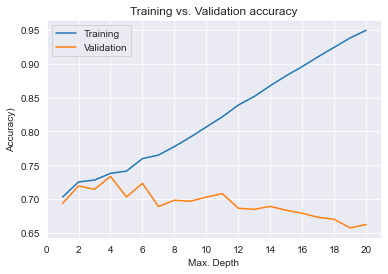

In [ ]:
plt.figure()
plt.plot(acc_score['max_depth'], acc_score['training accuracy'])
plt.plot(acc_score['max_depth'], acc_score['validation accuracy'])
plt.title('Training vs. Validation accuracy')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Accuracy)')
plt.legend(['Training', 'Validation'])

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=8,random_state=42)

In [ ]:
tree_model.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [ ]:
y_train_pred = tree_model.predict(x_train_sm)

In [ ]:
print(confusion_matrix(y_train_sm,y_train_pred,normalize = 'true'))
print('accuracy score:',accuracy_score(y_train_sm,y_train_pred))
print('recall score:',recall_score(y_train_sm,y_train_pred))
print('precision score:',precision_score(y_train_sm,y_train_pred))

[[0.7221634 0.2778366]
 [0.167049  0.832951 ]]
accuracy score: 0.7775572025174989
recall score: 0.8329510028821834
precision score: 0.7498742354841272


In [ ]:
y_test_pred = tree_model.predict(x_test_sm)

In [ ]:
print(confusion_matrix(y_test_sm,y_test_pred,normalize = 'true'))
print('accuracy score:',accuracy_score(y_test_sm,y_test_pred))
print('recall score:',recall_score(y_test_sm,y_test_pred))
print('precision score:',precision_score(y_test_sm,y_test_pred))

[[0.58814554 0.41185446]
 [0.19166667 0.80833333]]
accuracy score: 0.6982394366197183
recall score: 0.8083333333333333
precision score: 0.6624663332050789


# Random Forrest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=42,n_jobs=-1)

In [ ]:
def train_predict(input,output,model):
    y_train_pred = model.predict(input)
    print(confusion_matrix(output,y_train_pred,normalize = 'true'))
    print('accuracy score:',accuracy_score(output,y_train_pred))
    print('recall score:',recall_score(output,y_train_pred))
    print('precision score:',precision_score(output,y_train_pred))

In [ ]:
def test_predict(input,output,model):
    y_test_pred = model.predict(input)
    print(confusion_matrix(output,y_test_pred,normalize = 'true'))
    print('accuracy score:',accuracy_score(output,y_test_pred))
    print('recall score:',recall_score(output,y_test_pred))
    print('precision score:',precision_score(output,y_test_pred))

In [ ]:
random.fit(x_train_sm,y_train_sm)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_train_pred = random.predict(x_train_sm)

In [ ]:
train_predict(x_train_sm,y_train_sm,model=random)

[[0.99808835 0.00191165]
 [0.00199988 0.99800012]]
accuracy score: 0.9980442326921946
recall score: 0.9980001176401389
precision score: 0.9980881790640901


In [ ]:
y_test_pred = random.predict(x_test_sm)

In [ ]:
test_predict(x_test_sm,y_test_sm,model=random)

[[0.84706573 0.15293427]
 [0.20833333 0.79166667]]
accuracy score: 0.8193661971830986
recall score: 0.7916666666666666
precision score: 0.8380964214711729


In [ ]:
conf_matrix = confusion_matrix(y_test_sm,y_test_pred,normalize='true')
conf_matrix

array([[0.84706573, 0.15293427],
       [0.20833333, 0.79166667]])

Text(0.5, 1.0, 'Confusion Matrix of Actual vs Predicted respones')

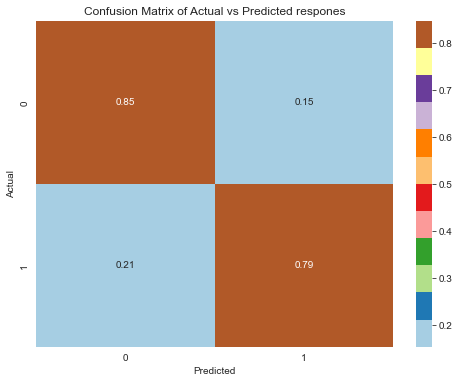

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap='Paired')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Actual vs Predicted respones')

In [ ]:
len(random.estimators_)

100

In [ ]:
features = pd.DataFrame({'features':x_train_mencoded.columns,'importance':random.feature_importances_})
features = features.sort_values('importance',ascending=False)

Text(0.5, 0, 'Importance')

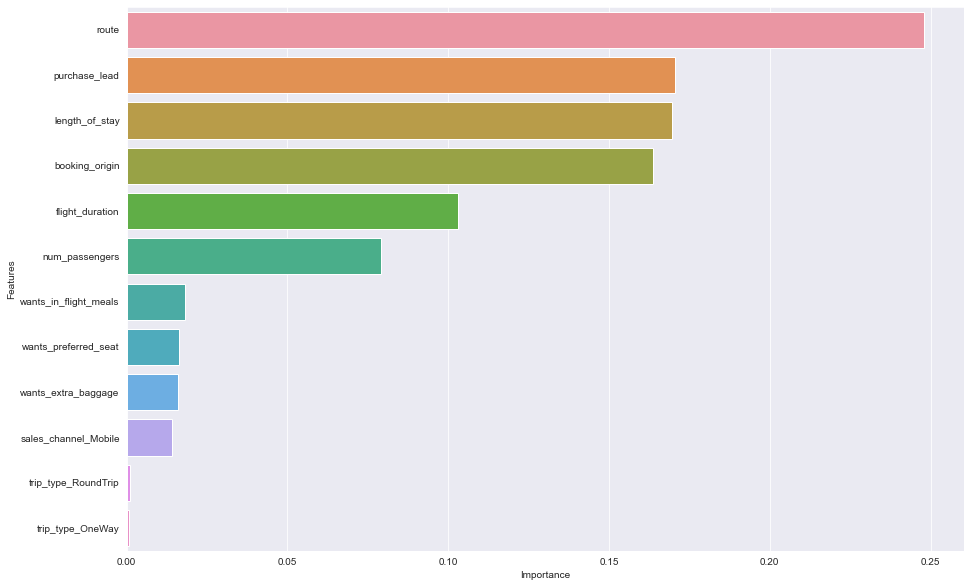

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=features,x='importance',y ='features')
plt.ylabel('Features')
plt.xlabel('Importance')


In [ ]:
print(classification_report(y_test_sm,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      8520
           1       0.84      0.79      0.81      8520

    accuracy                           0.82     17040
   macro avg       0.82      0.82      0.82     17040
weighted avg       0.82      0.82      0.82     17040



In [ ]:
random = RandomForestClassifier(n_estimators=300,n_jobs=-1,random_state=42)
random.fit(x_train_sm,y_train_sm)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
train_predict(x_train_sm,y_train_sm,model=random)

[[0.99805894 0.00194106]
 [0.00188224 0.99811776]]
accuracy score: 0.9980883477442504
recall score: 0.9981177577789542
precision score: 0.9980590518762499


In [ ]:
test_predict(x_test_sm,y_test_sm,model=random)

[[0.84014085 0.15985915]
 [0.20305164 0.79694836]]
accuracy score: 0.8185446009389671
recall score: 0.7969483568075117
precision score: 0.8329244357212954


# SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=42)

In [ ]:
#svm.fit(x_train_sm,y_train_sm)

In [ ]:
#train_predict(x_train_sm,y_train_sm,model=svm)

In [ ]:
#test_predict(x_test_sm,y_test_sm,model=svm)

In [ ]:
#y_test_pred = svm.predict(x_test_sm)

In [ ]:
#from sklearn.metrics import classification_report

In [ ]:
#print(classification_report(y_test_sm,y_test_pred))

In [ ]:
!pip install auto-sklearn 

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\riddh\anaconda3\python.exe' 'C:\Users\riddh\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' get_requires_for_build_wheel 'C:\Users\riddh\AppData\Local\Temp\tmpvu0u40o1'
       cwd: C:\Users\riddh\AppData\Local\Temp\pip-install-wytql7s_\auto-sklearn_46831cf39c9e495aba7fdf2b4f32e3d2
  Complete output (17 lines):
  Traceback (most recent call last):
    File "C:\Users\riddh\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 349, in <module>
      main()
    File "C:\Users\riddh\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 331, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\riddh\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 117, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\riddh\AppData\Local\Temp\pip-build-env-zlsgk9

  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached auto-sklearn-0.14.7.tar.gz (6.4 MB)
  Using cached auto-sklearn-0.14.6.tar.gz (6.4 MB)
  Using cached auto-sklearn-0.14.5.tar.gz (6.4 MB)
  Using cached auto-sklearn-0.14.4.tar.gz (6.4 MB)
  Using cached auto-sklearn-0.14.3.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.14.2.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.14.1.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.14.0.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.13.0.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.12.7.tar.gz (6.3 MB)
  Using cached auto-sklearn-0.12.6.tar.gz (6.1 MB)
  Using cached auto-sklearn-0.12.5.tar.gz (6.1 MB)
  Using cached auto-sklearn-0.12.4.tar.gz (6.1 MB)
  Using cached auto-sklearn-0.12.3.tar.gz (6.1 MB)
  Using cached aut


      File "C:\Users\riddh\AppData\Local\Temp\pip-install-wytql7s_\auto-sklearn_08b22a99efb541c4b4bb1e9707be520b\setup.py", line 9, in <module>
        raise ValueError(
    ValueError: Detected unsupported operating system: win32. Please check the compability information of auto-sklearn: https://automl.github.io/auto-sklearn/master/installation.html#windows-osx-compatibility
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\riddh\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\riddh\\AppData\\Local\\Temp\\pip-install-wytql7s_\\auto-sklearn_b29bd63bd631471ca85f8c39249bee2d\\setup.py'"'"'; __file__='"'"'C:\\Users\\riddh\\AppData\\Local\\Temp\\pip-install-wytql7s_\\auto-sklearn_b29bd63bd631471ca85f8c39249bee2d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"'


  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\feature_costs.arff -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\feature_runstatus.arff -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\feature_values.arff -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\readme.txt -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  creating build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_multiclass.classification_dense
  copying autosklearn\metalearning\files\recall_macro_multiclass.classification_den